In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [2]:
df=pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info(),df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(None,
 gender                         0
 race_ethnicity                 0
 parental_level_of_education    0
 lunch                          0
 test_preparation_course        0
 math_score                     0
 reading_score                  0
 writing_score                  0
 dtype: int64)

In [4]:
df.duplicated().sum()

0

In [5]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
print(f"Categories in 'gender' variable : {df['gender'].unique()}")

print(f"Categories in 'race/ethinicity' variable : {df['race_ethnicity'].unique()}")

print(f"Categories in 'Parental level of education' variable : {df['parental_level_of_education'].unique()}")

print(f"Categories in 'Lunch' variable : {df['lunch'].unique()}")

print(f"Categories in 'test preparation course' variable : {df['test_preparation_course'].unique()}")



Categories in 'gender' variable : ['female' 'male']
Categories in 'race/ethinicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable : ['standard' 'free/reduced']
Categories in 'test preparation course' variable : ['none' 'completed']


In [8]:
# define for numeric & categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print(f"we have {len(numeric_features)} numeric features : {numeric_features}")
print(f"we have {len(categorical_features)} numeric features : {categorical_features}")

we have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
we have 5 numeric features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [9]:
df['average_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])


In [10]:
reading_full=df[df['reading_score']==100]['average_score'].count()
written_full=df[df['writing_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()

print(f"Number of students with full marks in maths :  {math_full}")
print(f"Number of students with full marks in reading :  {reading_full}")
print(f"Number of students with full marks in written :  {written_full}")


reading_less_20=df[df['reading_score']<=20]['average_score'].count()
written_less_20=df[df['writing_score']<=20]['average_score'].count()
math_less_20=df[df['math_score']<=20]['average_score'].count()

print(f"Number of students with less than 20 marks in maths :  {math_less_20}")
print(f"Number of students with less than 20 marks in reading :  {reading_less_20}")
print(f"Number of students with less than 20 marks in written :  {written_less_20}")


Number of students with full marks in maths :  7
Number of students with full marks in reading :  17
Number of students with full marks in written :  14
Number of students with less than 20 marks in maths :  4
Number of students with less than 20 marks in reading :  1
Number of students with less than 20 marks in written :  3


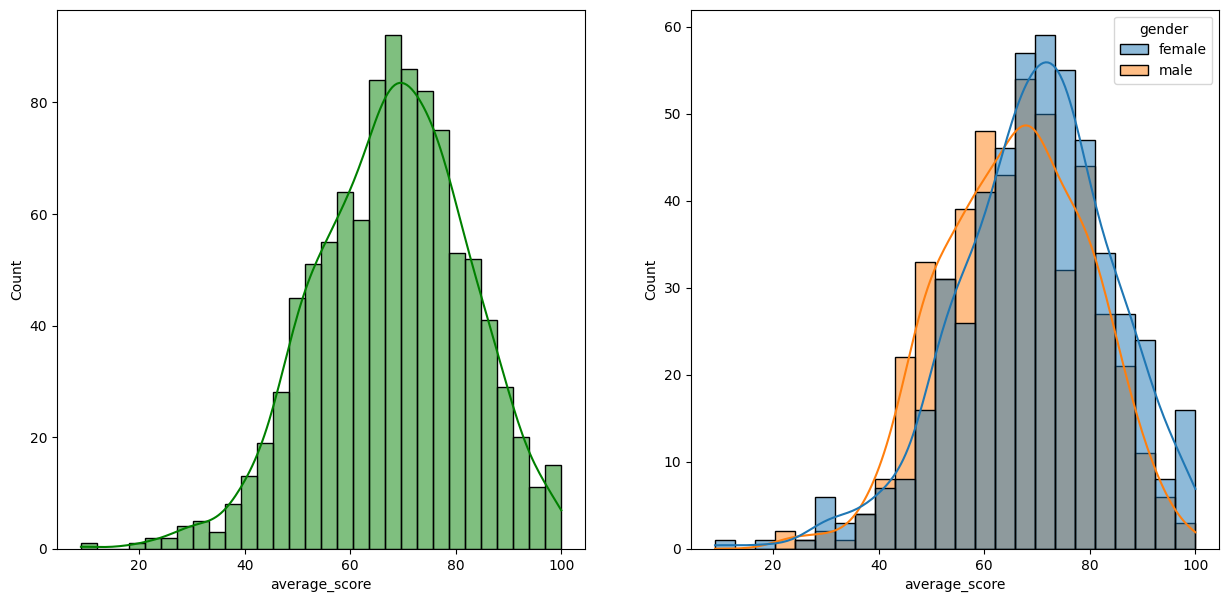

In [11]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',hue='gender',kde=True)
plt.show()

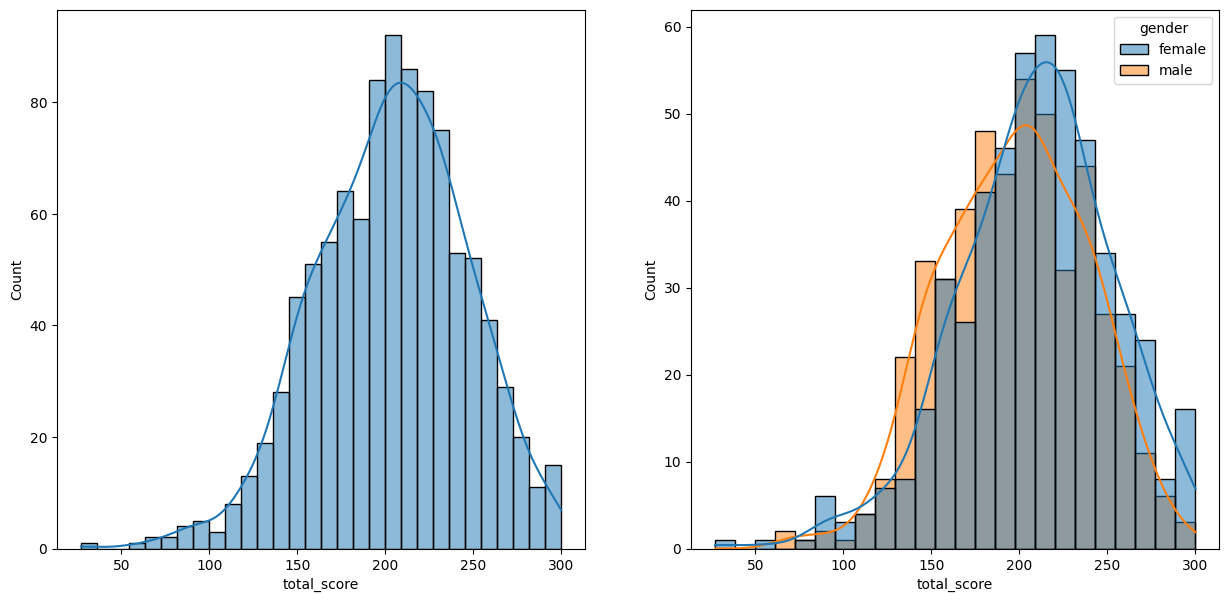

In [12]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=df,x='total_score',hue='gender',kde=True)
plt.show()

####  INSIGHTS
- Females students tends perform well then males

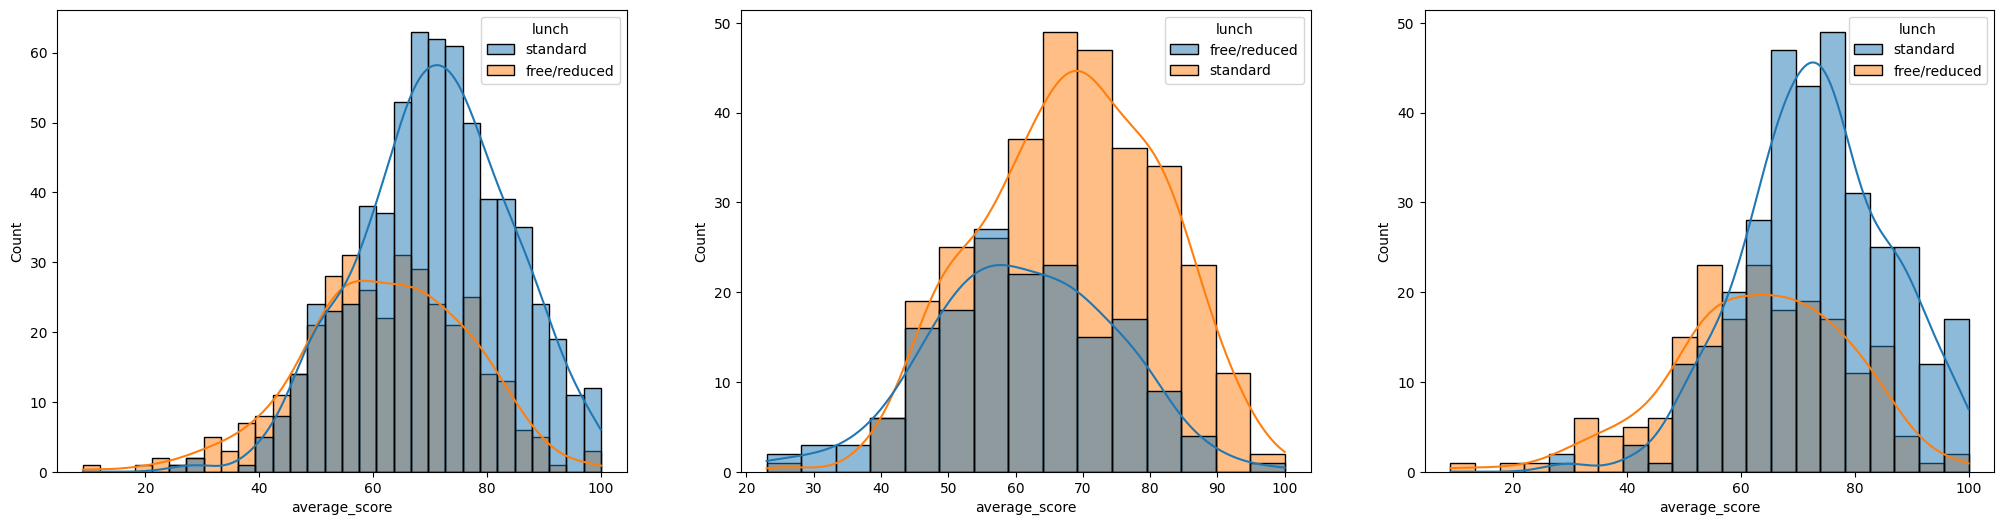

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,bins=30,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average_score',hue='lunch',kde=True)
plt.show()

#### INSIGHTS
- Standard lunch will increase the performance for both male and female

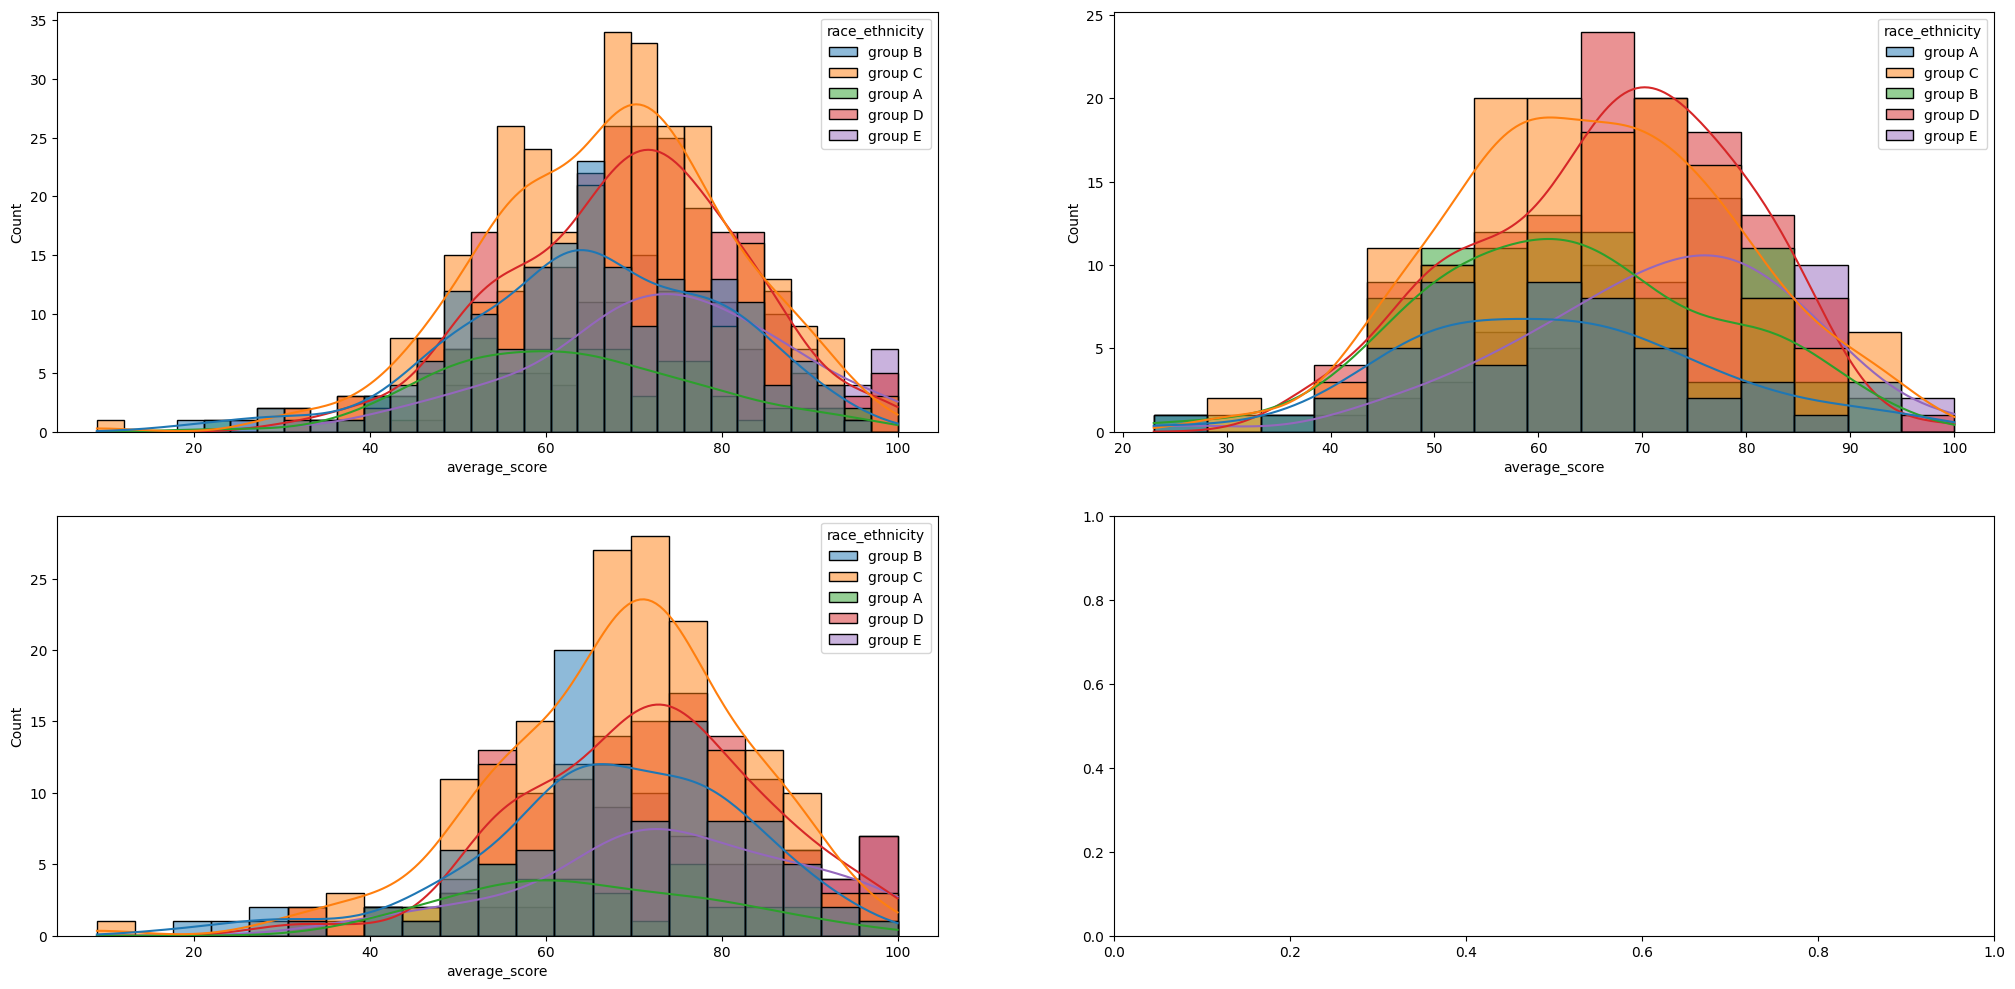

In [14]:
fig,axc=plt.subplots(2,2,figsize=(25,12))
sns.histplot(data=df,x='average_score',hue='race_ethnicity',kde=True,bins=30,ax=axc[0,0])
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='race_ethnicity',kde=True,ax=axc[0,1])
sns.histplot(data=df[df.gender=='female'],x='average_score',hue='race_ethnicity',kde=True,ax=axc[1,0])
plt.show()

### INSIGHTS
- Group A and B performs worst irrespective whether it's male or female
- Group C and D performs best irrespective whether it's male or female

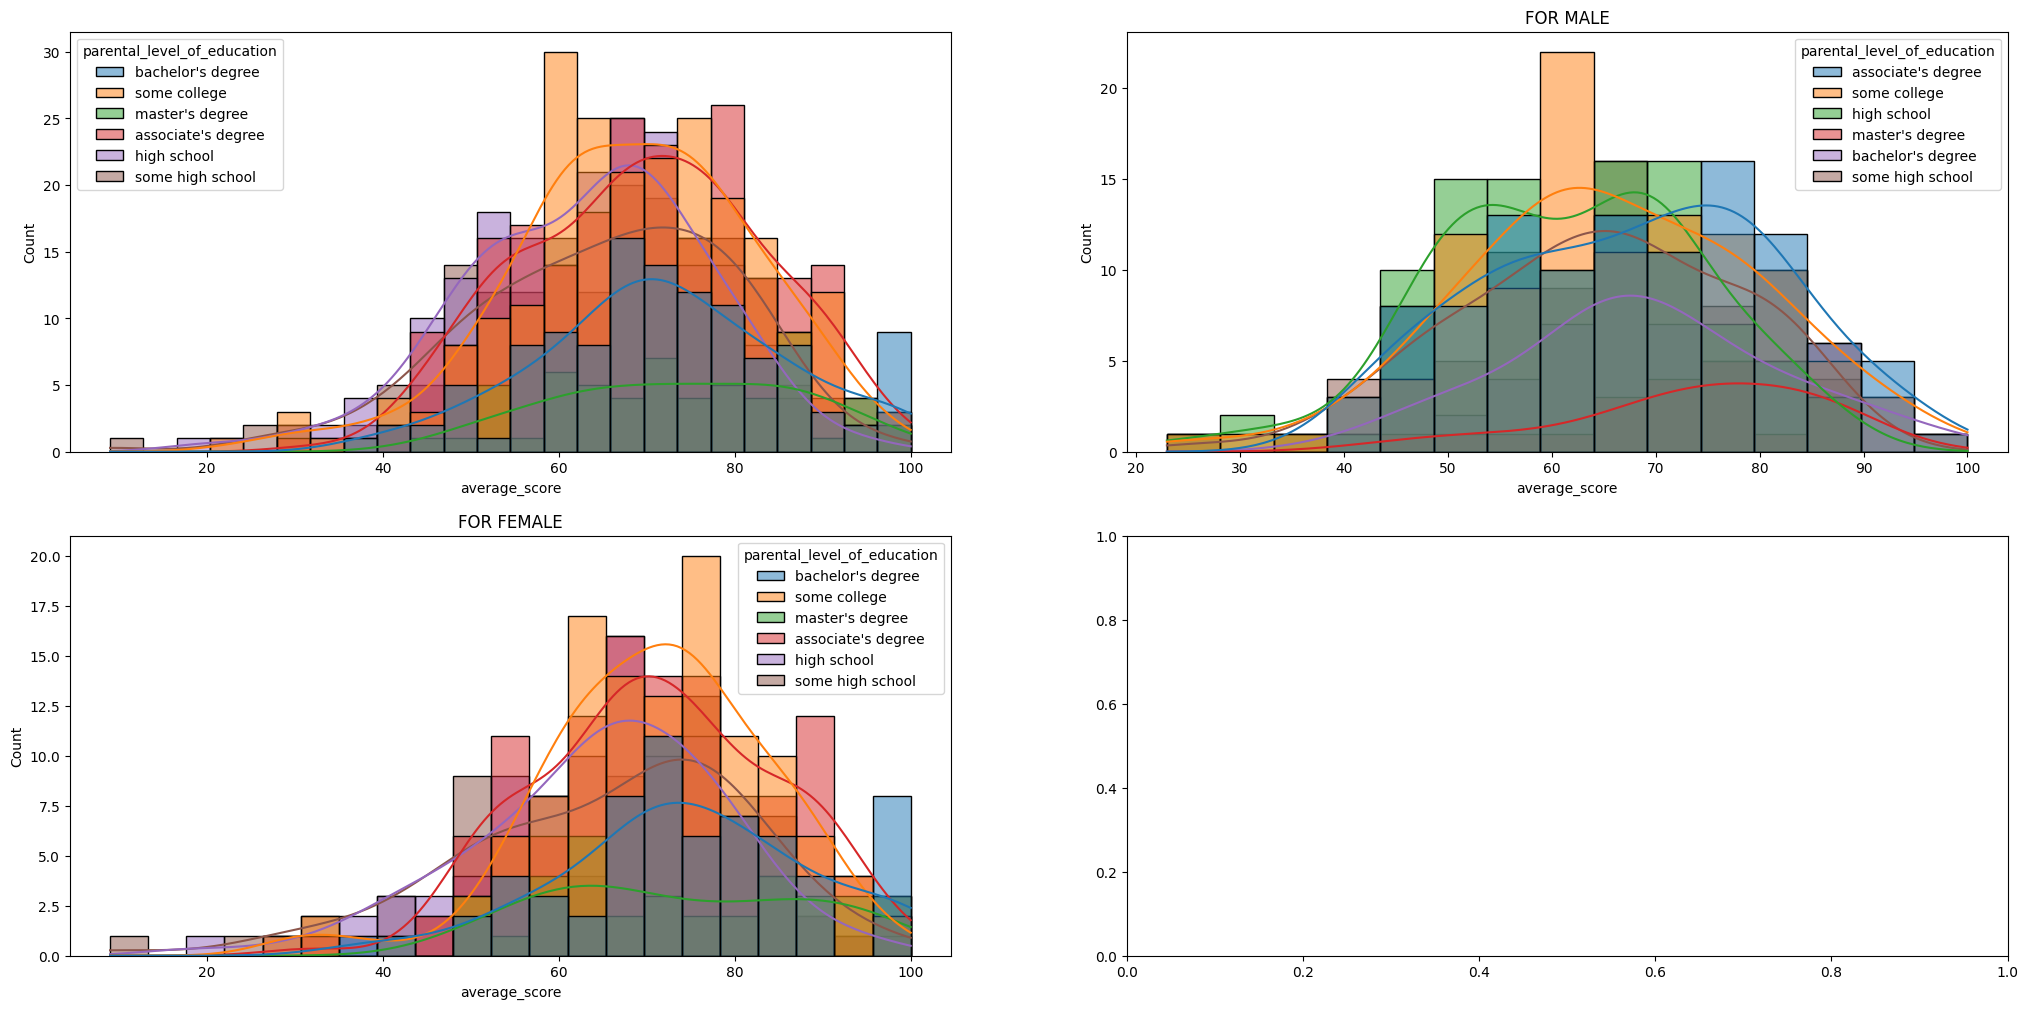

In [15]:
fig,axc=plt.subplots(2,2,figsize=(25,12))
sns.histplot(data=df,x='average_score',hue='parental_level_of_education',kde=True,ax=axc[0,0])
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education',ax=axc[0,1])
axc[0,1].set_title('FOR MALE')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education',ax=axc[1,0])
axc[1,0].set_title('FOR FEMALE')
plt.show()

In [16]:
print(df[df.parental_level_of_education=="master's degree"]['average_score'].median())
print(df[df.parental_level_of_education=="bachelor's degree"]['average_score'].median())
print(df[df.parental_level_of_education=="some college"]['average_score'].median())
print(df[df.parental_level_of_education=="some high school"]['average_score'].median())
print(df[df.parental_level_of_education=="high school"]['average_score'].median())
print(df[df.parental_level_of_education=="associate's degree"]['average_score'].median())

73.33333333333333
71.16666666666666
68.66666666666667
66.66666666666667
65.0
69.66666666666667


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

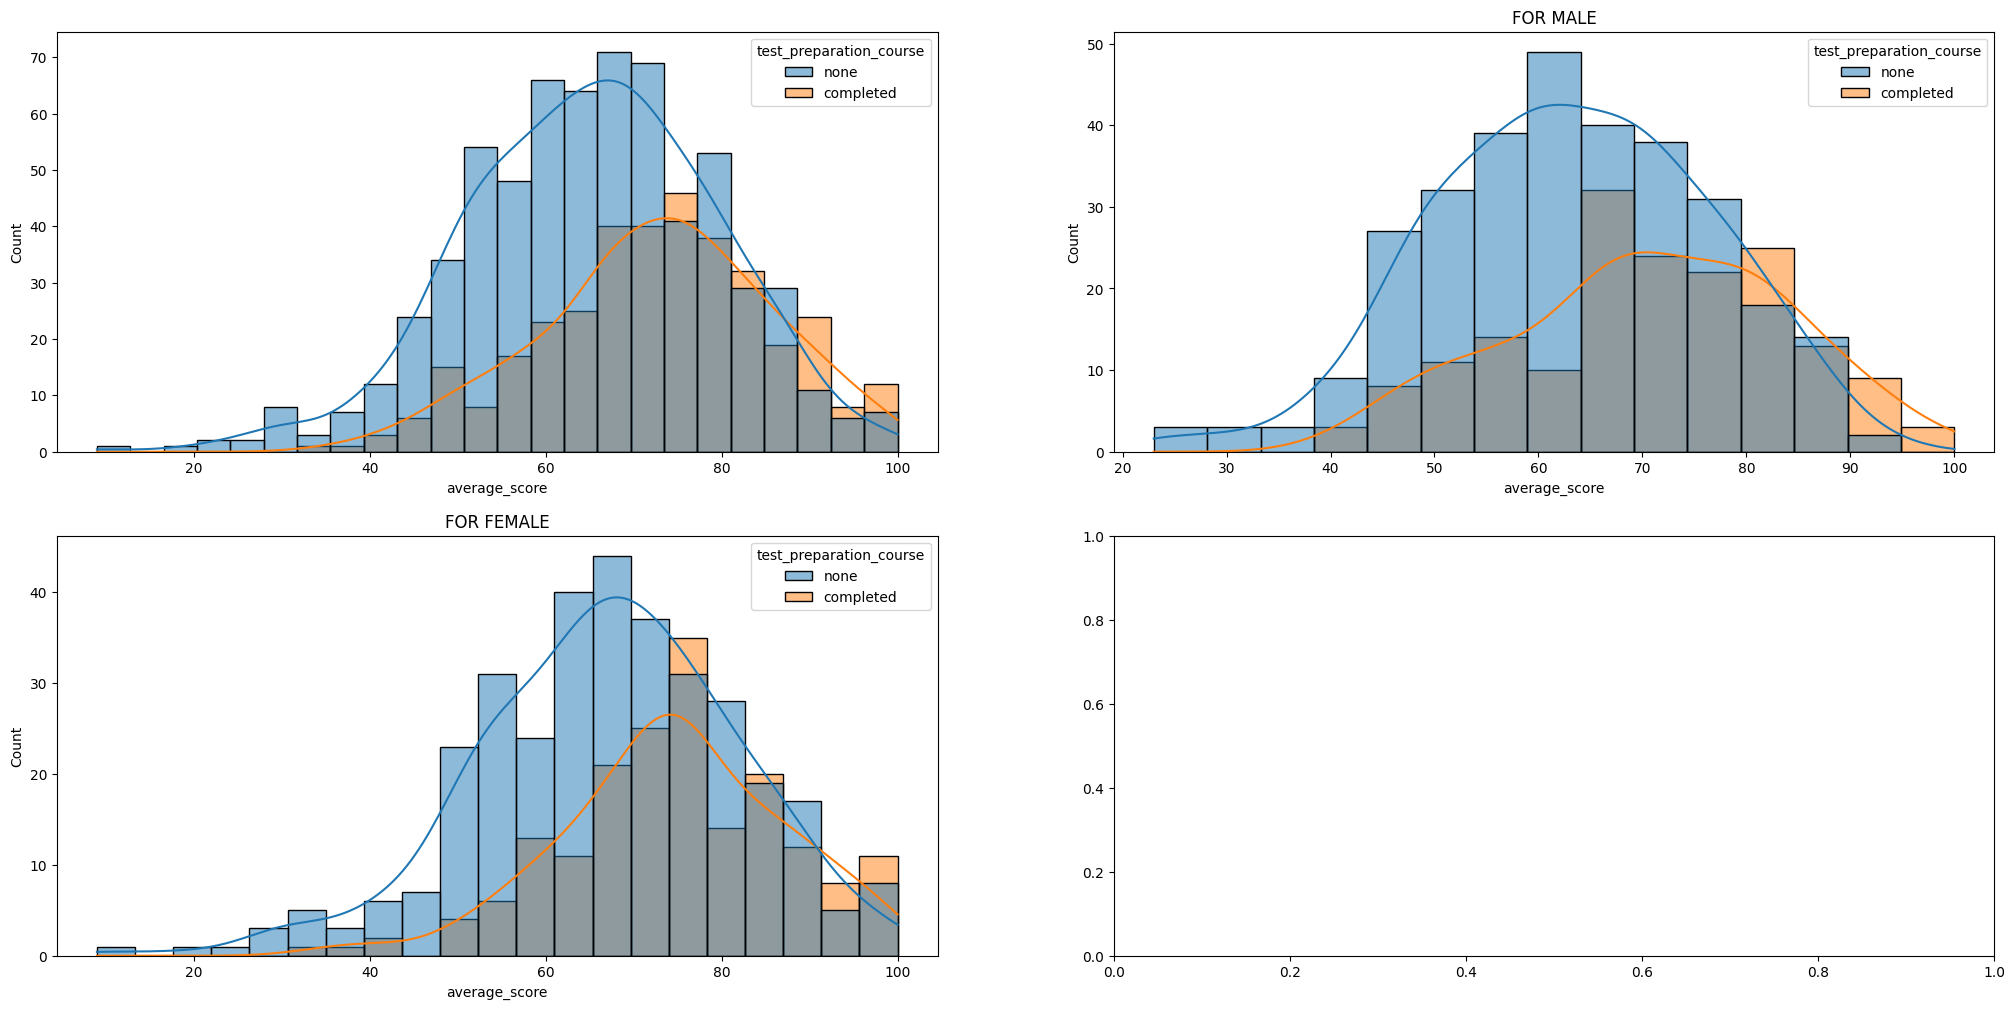

In [17]:
fig,axc=plt.subplots(2,2,figsize=(25,12))
sns.histplot(data=df,x='average_score',hue='test_preparation_course',kde=True,ax=axc[0,0])
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test_preparation_course',ax=axc[0,1])
axc[0,1].set_title('FOR MALE')
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test_preparation_course',ax=axc[1,0])
axc[1,0].set_title('FOR FEMALE')
plt.show()

### INSIGHTS
- Generally those who have completed there test preparation course scores more than those not completed irrespective male or female

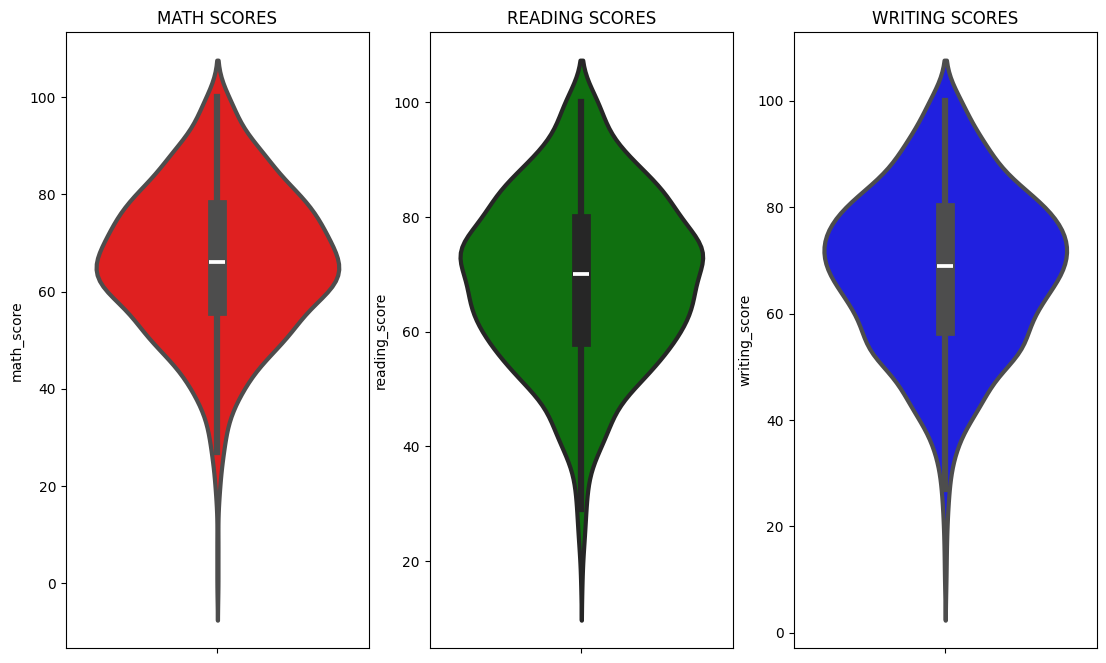

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Categories in 'gender' variable : ['female' 'male']
Categories in 'race/ethinicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable : ['standard' 'free/reduced']
Categories in 'test preparation course' variable : ['none' 'completed']

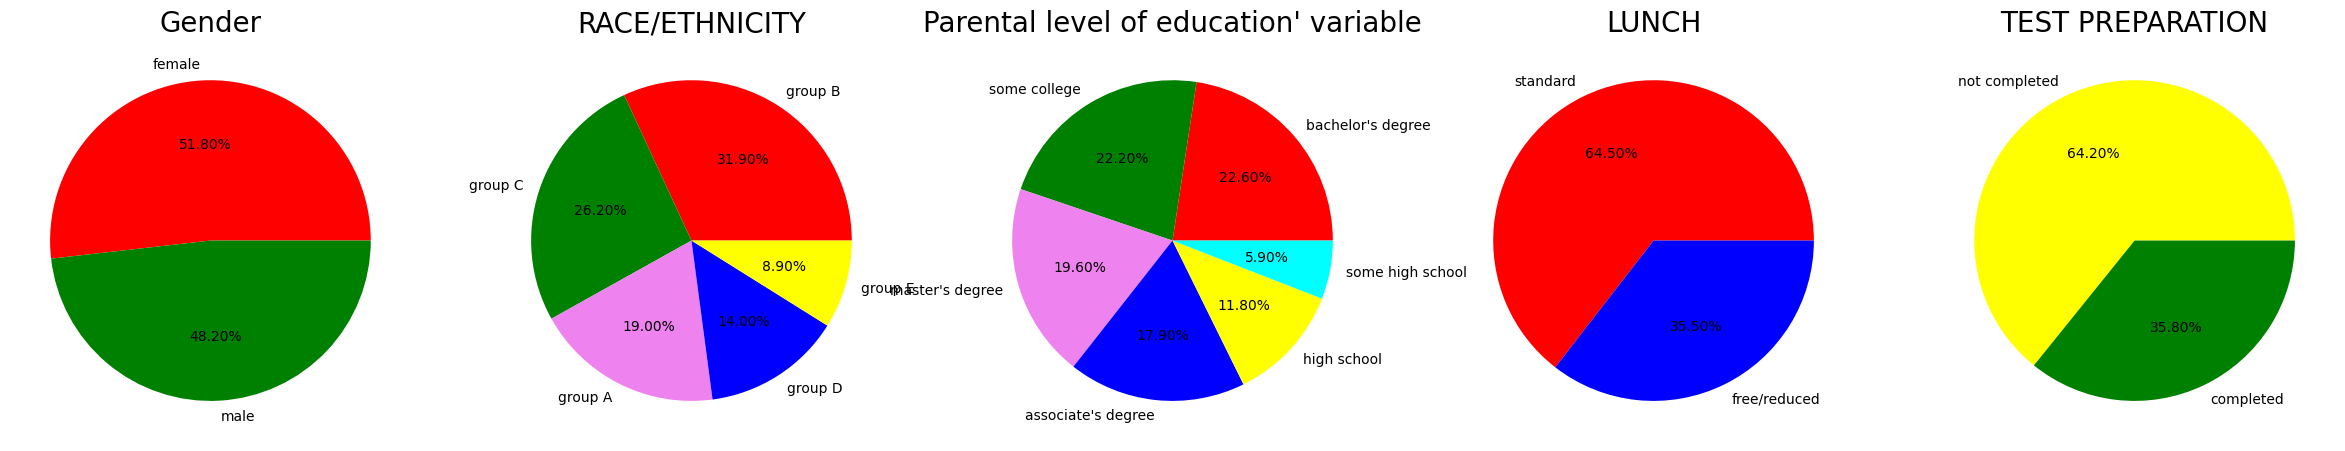

In [19]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['female' ,'male']
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=['group B', 'group C', 'group A', 'group D', 'group E']
color=['red','green','violet','blue','yellow']

plt.pie(size,labels=labels,colors=color,autopct='%.2f%%')
plt.title('RACE/ETHNICITY',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=["bachelor's degree", 'some college', "master's degree", "associate's degree",'high school' ,'some high school']
color=['red','green','violet','blue','yellow','cyan']

plt.pie(size,labels=labels,colors=color,autopct='%.2f%%')
plt.title("Parental level of education' variable",fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard', 'free/reduced']
color=['red','blue']

plt.pie(size,labels=labels,colors=color,autopct='%.2f%%')
plt.title('LUNCH',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=['not completed' ,'completed']
color=['yellow','green']

plt.pie(size,labels=labels,colors=color,autopct='%.2f%%')
plt.title('TEST PREPARATION',fontsize=20)
plt.axis('off')


plt.show()



### INSIGHTS
- Number of male & female students are almost equal
- Group B has largest number of students followed by group C
- parents with bachelor's degree and from some other college are almost equal
- Number of students with standard lunch are greater than free/reduced lunch
- students with not completed course are more

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


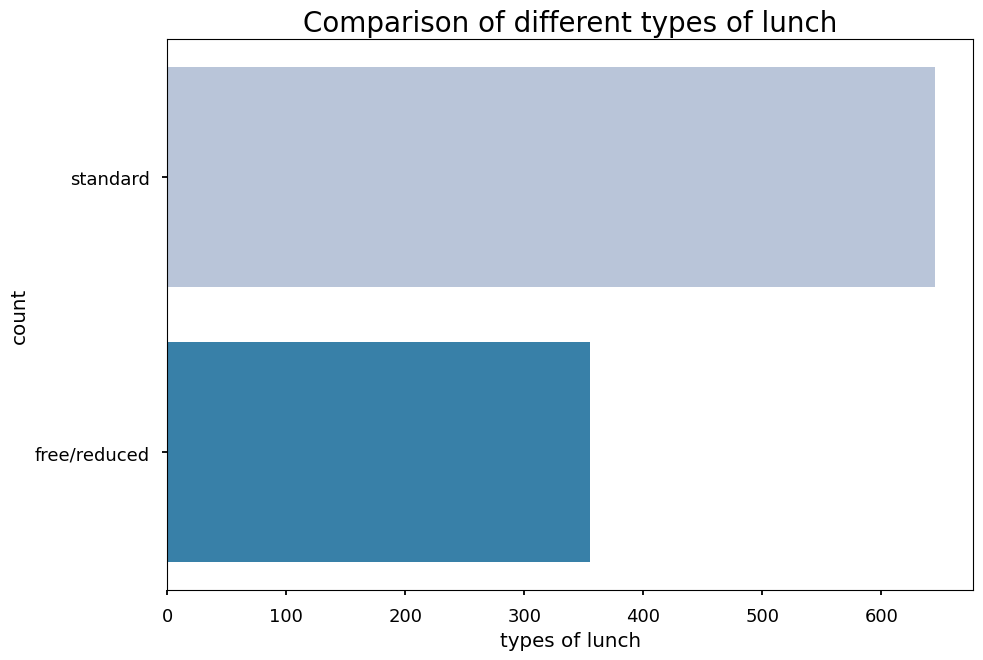

In [21]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

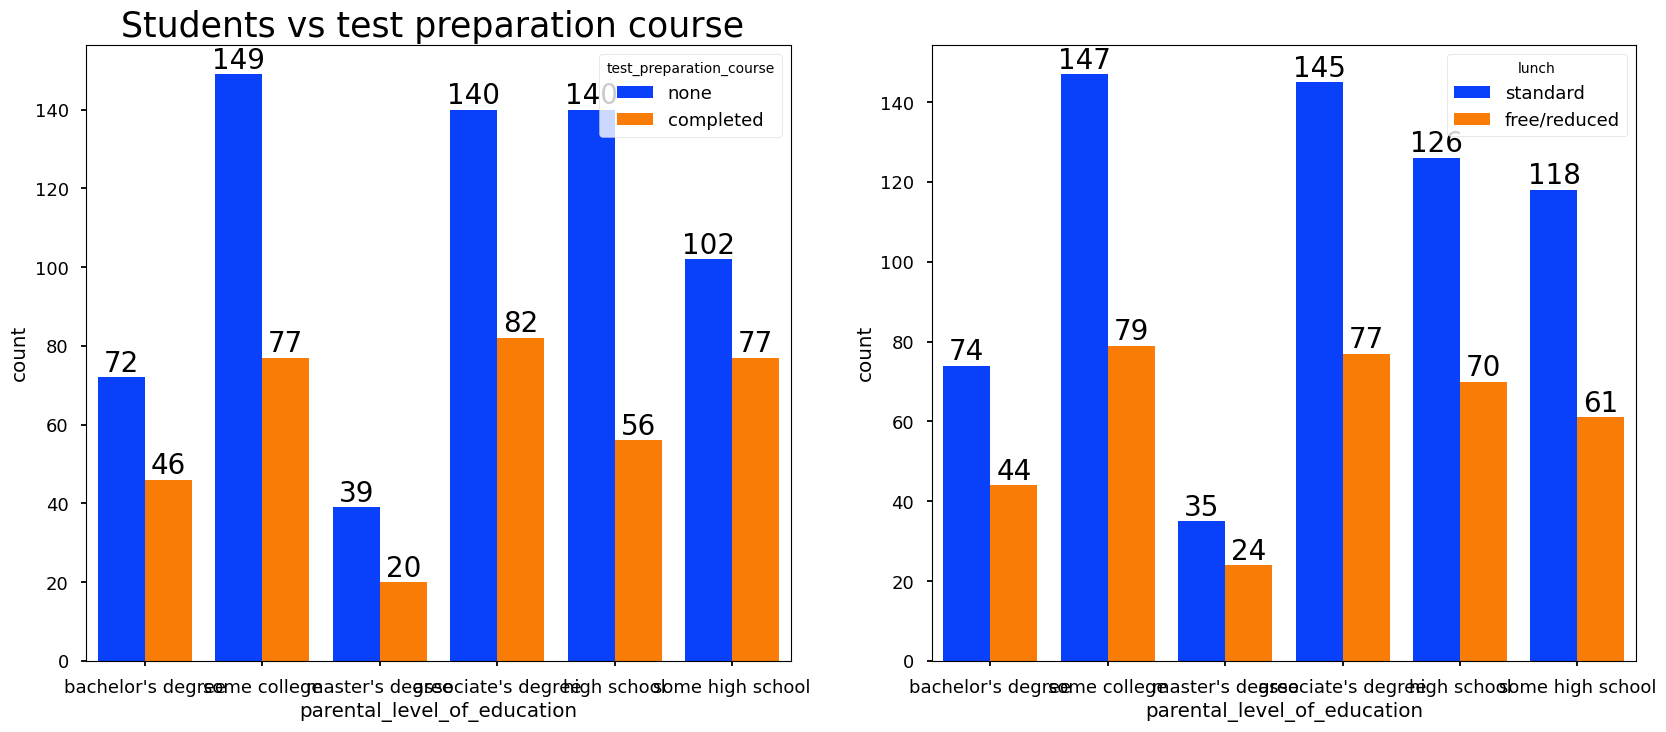

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

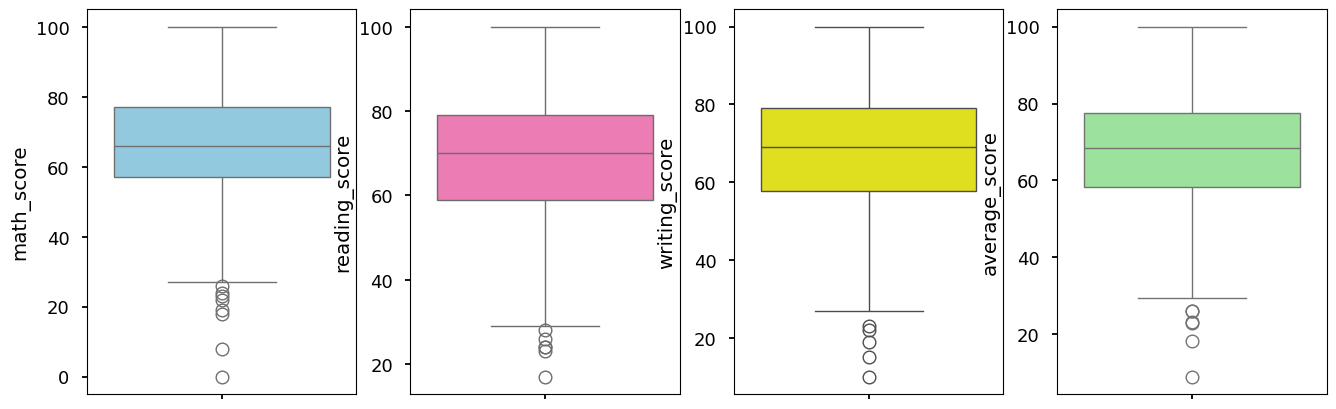

In [23]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

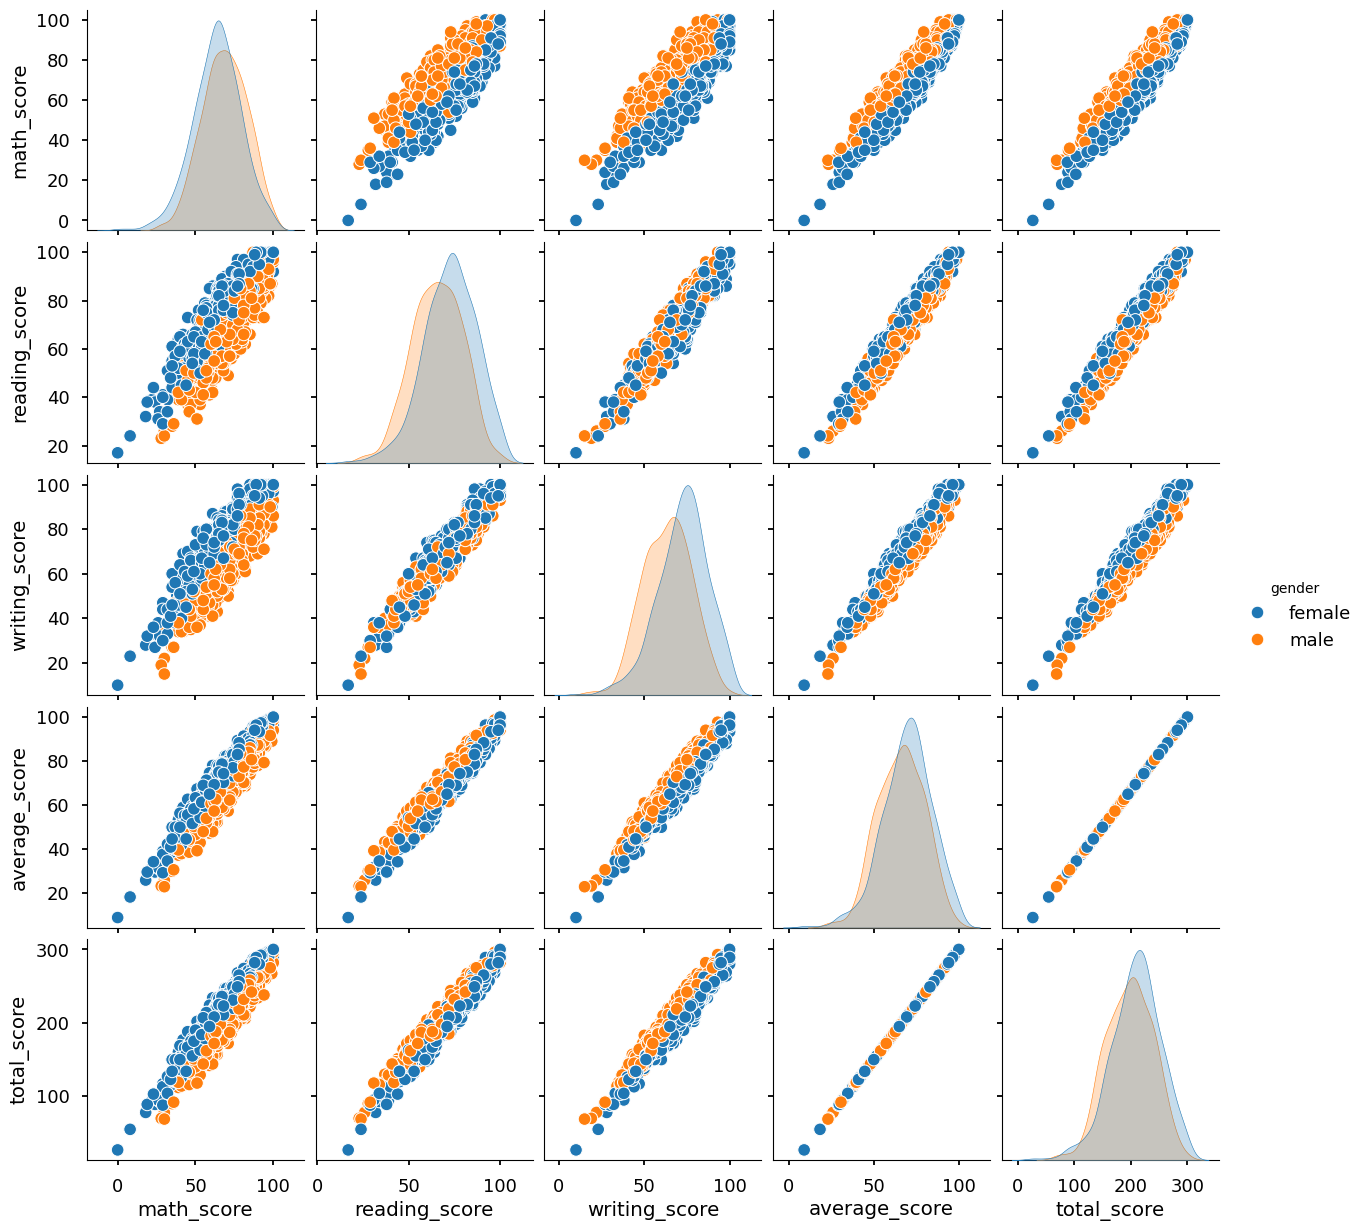

In [24]:
sns.pairplot(data=df,hue='gender')
plt.show()

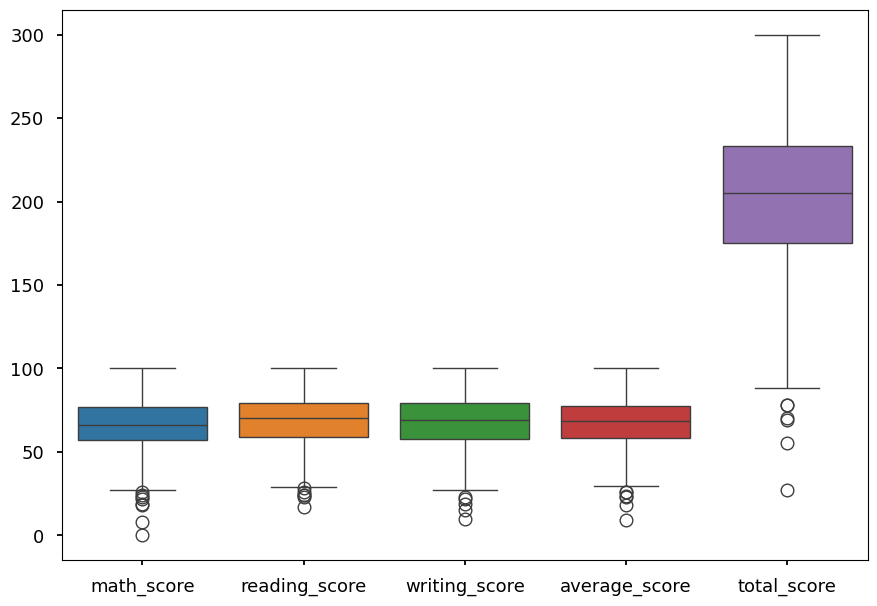

In [25]:
sns.boxplot(data=df)
plt.show()